In [121]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.io import arff
import pandas as pd
from pandas import DataFrame,Series
# 创建视图
sess=tf.Session()
# 数据集处理
data=arff.loadarff('C:\\Users\\yzy\\Desktop\\data_for_ml\\Arff\\lowbwt.arff')
data1=DataFrame(data[0])
data2=np.array(data1,dtype=np.float32)
y_var=data2[:,0:1]
x_vars=data2[:,1:8]
# max -min 缩放
max_x=x_vars.max(axis=0)
min_x=x_vars.min(axis=0)
dis=max_x-min_x
sub=np.subtract(x_vars,min_x)
x_vars=np.divide(sub,dis)
# 划分测试集与训练集
train_index=np.random.choice(len(y_var),size=round(len(y_var)*0.7))
test_index=np.setdiff1d(range(len(y_var)),train_index)
x_vars_train=x_vars[train_index,:]
x_vars_test=x_vars[test_index,:]
y_var_train=y_var[train_index]
y_var_test=y_var[test_index]
# 声明变量和计算式
xvar=tf.placeholder(shape=[None,7],dtype=tf.float32)
yvar=tf.placeholder(shape=[None,1],dtype=tf.float32)
A=tf.Variable(tf.random_normal(shape=[7,1]))
b=tf.Variable(tf.random_normal(shape=[1,1]))
fx=tf.add(tf.matmul(xvar,A),b)
# 声明LOSS函数
loss=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=fx,labels=yvar))
# 声明迭代器
train=tf.train.GradientDescentOptimizer(0.01)
train_step=train.minimize(loss)
# 初始化变量
init=tf.global_variables_initializer()
sess.run(init)
# 衡量准确度
predict=tf.round(tf.sigmoid(fx))
predict_correct=tf.cast(tf.equal(predict,yvar),tf.float32)
accuracy=tf.reduce_mean(predict_correct)
# 设置记录容器
train_ac=[]
test_ac=[]
loss_iter=[]
# 开始迭代
for i in range(1600):
    randindex=np.random.choice(len(y_var_train),25)
    randx=x_vars_train[randindex,:]
    randy=y_var_train[randindex]
    sess.run(train_step,feed_dict={xvar:randx,yvar:randy})
    lossvalue=sess.run(loss,feed_dict={xvar:randx,yvar:randy})
    loss_iter.append(lossvalue)
    trainaccvalue=sess.run(accuracy,feed_dict={xvar:x_vars_train,yvar:y_var_train})
    train_ac.append(trainaccvalue)
    testaccvalue=sess.run(accuracy,feed_dict={xvar:x_vars_test,yvar:y_var_test})
    test_ac.append(testaccvalue)

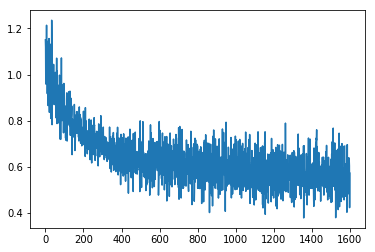

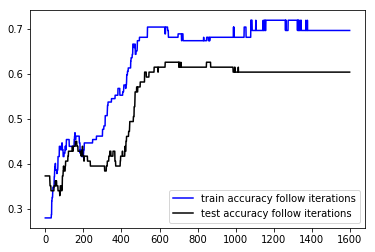

In [124]:
x=range(1600)
plt.plot(x,loss_iter,label='loss follow iterations')
plt.show()
plt.close()
plt.plot(x,train_ac,'b-',label='train accuracy follow iterations')
plt.plot(x,test_ac,'k-',label='test accuracy follow iterations')
plt.legend(loc='lower right')
plt.show()
plt.close()